In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib
import os
import warnings
warnings.filterwarnings("ignore")

In [218]:
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("../data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [220]:
print(df.shape)
print(df.info())
print(df.describe())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479  

In [221]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    print(f"{col} -> 0: {(df[col] == 0).sum()}")

Glucose -> 0: 5
BloodPressure -> 0: 35
SkinThickness -> 0: 227
Insulin -> 0: 374
BMI -> 0: 11


In [222]:
df[zero_cols] = df[zero_cols].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [223]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [224]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [225]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [227]:
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC AUC: 0.8211202938475666


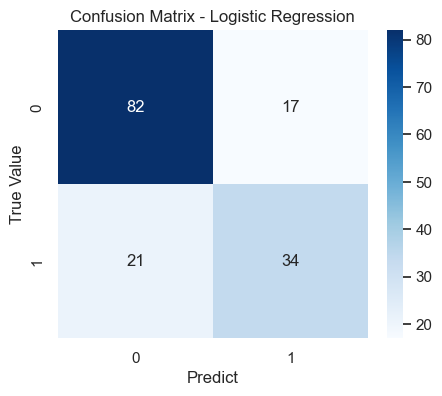

In [228]:
conf_mat = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('True Value')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [249]:
os.makedirs("../models", exist_ok=True)

In [252]:

joblib.dump(lr_model, f"../models/diabetes_lr_model.pkl")
joblib.dump(scaler, f"..//models/scaler.pkl")

['..//models/scaler.pkl']

In [253]:
sample = np.array([[7, 187, 50, 33, 392, 33.9, 0.826, 34]])
sample_scaled = scaler.transform(sample)
pred = lr_model.predict(sample)
prob = lr_model.predict_proba(sample)[0][1]

print("Have Diabetes" if pred[0] == 1 else "No Diabetes")
print(f"probably: {prob*100:.2f}%")

Have Diabetes
probably: 88.83%
